In [1]:
import numpy as np
import pandas as pd
from matplotlib import image
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
%matplotlib inline

In [2]:
Xdigits, ydigits = datasets.load_digits(return_X_y=True)
Xdigits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

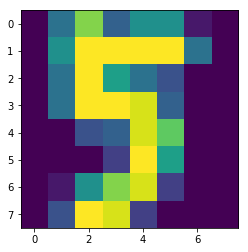

In [41]:
#x = preprocessing.normalize(Xdigits[33])

plt.imshow(Xdigits[33].reshape(8,8));

In [42]:
#Scale = preprocessing.StandardScaler()
Scale.fit(Xdigits)
X = Scale.transform(Xdigits)
Modelo = model_selection.KFold(n_splits=5,shuffle=True,random_state=3)
mediaKNN=0
mediaSVM=0
mediaLR=0
for train, test in Modelo.split(Xdigits):
    modelK = neighbors.KNeighborsClassifier(n_neighbors=5)
    modelSVM = svm.SVC(C=1)
    modelLR = linear_model.LogisticRegression()
    
    modelK.fit(Xdigits[train],ydigits[train])
    modelSVM.fit(Xdigits[train],ydigits[train])
    modelLR.fit(Xdigits[train],ydigits[train])
    
    y_predK = modelK.predict(Xdigits[test])
    y_predSVM = modelSVM.predict(Xdigits[test])
    y_predLR= modelLR.predict(Xdigits[test])
    
    
    accK = metrics.accuracy_score(ydigits[test],y_predK)
    mediaKNN = mediaKNN + accK
    accSVM = metrics.accuracy_score(ydigits[test],y_predSVM)
    mediaSVM =mediaSVM+ accSVM
    accLR = metrics.accuracy_score(ydigits[test],y_predLR)
    mediaLR =mediaLR+ accLR
    print("KNN",accK)
    print("SVM",accSVM)
    print("LR",accLR)
    print()
mediaKNN = mediaKNN/5
mediaSVM = mediaSVM/5
mediaLR = mediaLR/5

print("Media",mediaKNN)
print("Media",mediaSVM)
print("Media",mediaLR)

KNN 0.9861111111111112
SVM 0.4666666666666667
LR 0.9527777777777777

KNN 0.9861111111111112
SVM 0.35555555555555557
LR 0.9555555555555556

KNN 0.9944289693593314
SVM 0.3649025069637883
LR 0.9721448467966574

KNN 0.9888579387186629
SVM 0.5459610027855153
LR 0.958217270194986

KNN 0.9805013927576601
SVM 0.3732590529247911
LR 0.9610027855153204

Media 0.9872021046115755
Media 0.42126895697926336
Media 0.9599396471680594


In [43]:
mediaKNN = 0
mediaSVM = 0
mediaLR=0
Modelo1 = model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=3)
for train, test in Modelo1.split(Xdigits,ydigits):
    modelK = neighbors.KNeighborsClassifier(n_neighbors=5)
    modelSVM = svm.SVC()
   # print ("train",train,",   test",test)
    modelLR = linear_model.LogisticRegression()
    modelK.fit(Xdigits[train],ydigits[train])
    modelSVM.fit(Xdigits[train],ydigits[train])
    modelLR.fit(Xdigits[train],ydigits[train])
    
    
    
    y_predK = modelK.predict(Xdigits[test])
    y_predSVM = modelSVM.predict(Xdigits[test])
    y_predLR= modelLR.predict(Xdigits[test])
    
    accK = metrics.accuracy_score(ydigits[test],y_predK)
    mediaKNN = mediaKNN + accK
    accSVM = metrics.accuracy_score(ydigits[test],y_predSVM)
    mediaSVM =mediaSVM+ accSVM
    accLR = metrics.accuracy_score(ydigits[test],y_predLR)
    mediaLR =mediaLR+ accLR
    print("KNN",accK)
    print("SVM",accSVM)
    print("LR",accLR)
    print()
mediaKNN = mediaKNN/5
mediaSVM = mediaSVM/5
mediaLR = mediaLR/5

print("Media",mediaKNN)
print("Media",mediaSVM)
print("Media",mediaLR)

KNN 0.989010989010989
SVM 0.5961538461538461
LR 0.9697802197802198

KNN 0.9834254143646409
SVM 0.6519337016574586
LR 0.9558011049723757

KNN 0.9777158774373259
SVM 0.5459610027855153
LR 0.9303621169916435

KNN 0.9943977591036415
SVM 0.5434173669467787
LR 0.969187675070028

KNN 0.9859154929577465
SVM 0.6169014084507042
LR 0.9605633802816902

Media 0.9860931065748687
Media 0.5908734651988606
Media 0.9571388994191914


In [45]:
#Scale = preprocessing.StandardScaler()
Scale.fit(Xdigits)
X = Scale.transform(Xdigits)
Modelo = model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=3)
mediaKNN=0
mediaSVM=0
mediaLR=0
for train, test in Modelo.split(Xdigits,ydigits):
    modelK = neighbors.KNeighborsClassifier(n_neighbors=5)
    modelSVM = svm.SVC()
    modelLR = linear_model.LogisticRegression()
    
    
    #Normalize
    Norm = preprocessing.StandardScaler()
    Norm.fit(Xdigits[train])
    X_train_norm = Norm.transform(Xdigits[train])
    X_test_norm = Norm.transform(Xdigits[test])
    
    #Normal
    #modelK.fit(Xdigits[train],ydigits[train])
    #modelSVM.fit(Xdigits[train],ydigits[train])
    #modelLR.fit(Xdigits[train],ydigits[train])
    #Normalize
    modelK.fit(X_train_norm,ydigits[train])
    modelSVM.fit(X_train_norm,ydigits[train])
    modelLR.fit(X_train_norm,ydigits[train])

    
    y_predK = modelK.predict(X_test_norm)
    y_predSVM = modelSVM.predict(X_test_norm)
    y_predLR= modelLR.predict(X_test_norm)
    
    
    accK = metrics.accuracy_score(ydigits[test],y_predK)
    mediaKNN = mediaKNN + accK
    accSVM = metrics.accuracy_score(ydigits[test],y_predSVM)
    mediaSVM =mediaSVM+ accSVM
    accLR = metrics.accuracy_score(ydigits[test],y_predLR)
    mediaLR =mediaLR+ accLR
    print("KNN",accK)
    print("SVM",accSVM)
    print("LR",accLR)
    print()
mediaKNN = mediaKNN/5
mediaSVM = mediaSVM/5
mediaLR = mediaLR/5

print("Media",mediaKNN)
print("Media",mediaSVM)
print("Media",mediaLR)

KNN 0.9697802197802198
SVM 0.978021978021978
LR 0.9642857142857143

KNN 0.9723756906077348
SVM 0.9806629834254144
LR 0.9640883977900553

KNN 0.9693593314763231
SVM 0.9888579387186629
LR 0.9526462395543176

KNN 0.9831932773109243
SVM 0.988795518207283
LR 0.9747899159663865

KNN 0.9774647887323944
SVM 0.9802816901408451
LR 0.9633802816901409

Media 0.9744346615815193
Media 0.9833240217028365
Media 0.963838109857323


In [47]:
#Scale = preprocessing.StandardScaler()
Scale.fit(Xdigits)
X = Scale.transform(Xdigits)
Modelo = model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=3)
mediaKNN=0
mediaSVM=0
mediaLR=0
for train, test in Modelo.split(Xdigits,ydigits):
    modelK = neighbors.KNeighborsClassifier(n_neighbors=5)
    modelSVM = svm.SVC()
    modelLR = linear_model.LogisticRegression()
    
    
    #Normalize
    Stand = preprocessing.MinMaxScaler()
    Stand.fit(Xdigits[train])
    X_train_stan = Stand.transform(Xdigits[train])
    X_test_stan = Stand.transform(Xdigits[test])
    
    #Normal
    #modelK.fit(Xdigits[train],ydigits[train])
    #modelSVM.fit(Xdigits[train],ydigits[train])
    #modelLR.fit(Xdigits[train],ydigits[train])
    #Normalize
    modelK.fit(X_train_stan,ydigits[train])
    modelSVM.fit(X_train_stan,ydigits[train])
    modelLR.fit(X_train_stan,ydigits[train])

    
    y_predK = modelK.predict(X_test_stan)
    y_predSVM = modelSVM.predict(X_test_stan)
    y_predLR= modelLR.predict(X_test_stan)
    
    
    accK = metrics.accuracy_score(ydigits[test],y_predK)
    mediaKNN = mediaKNN + accK
    accSVM = metrics.accuracy_score(ydigits[test],y_predSVM)
    mediaSVM =mediaSVM+ accSVM
    accLR = metrics.accuracy_score(ydigits[test],y_predLR)
    mediaLR =mediaLR+ accLR
    print("KNN",accK)
    print("SVM",accSVM)
    print("LR",accLR)
    print()
mediaKNN = mediaKNN/5
mediaSVM = mediaSVM/5
mediaLR = mediaLR/5

print("Media",mediaKNN)
print("Media",mediaSVM)
print("Media",mediaLR)

KNN 0.989010989010989
SVM 0.9615384615384616
LR 0.967032967032967

KNN 0.9834254143646409
SVM 0.9613259668508287
LR 0.9585635359116023

KNN 0.9777158774373259
SVM 0.958217270194986
LR 0.947075208913649

KNN 0.9943977591036415
SVM 0.9719887955182073
LR 0.9803921568627451

KNN 0.9859154929577465
SVM 0.9690140845070423
LR 0.9577464788732394

Media 0.9860931065748687
Media 0.9644169157219054
Media 0.9621620695188404
